In [1]:
pip install pandas numpy scikit-learn nltk seaborn

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download("stopwords")
STOPWORDS = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ayushgupta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
df = pd.read_csv("spam.csv", encoding="latin-1")[['v1','v2']]
df.columns=['label','messages']
df['label']=df['label'].map({'ham':0,'spam':1})

In [36]:
df.head()

,label,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [39]:
def clean(text):
    text=text.lower()
    text=re.sub(f"[{string.punctuation}]", "", text)
    text=" ".join(word for word in text.split() if word not in STOPWORDS)
    return text
df["messages"]=df["messages"].apply(clean)

In [46]:
vectorizer=TfidfVectorizer()
x=vectorizer.fit_transform(df["messages"])
y=df["label"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)
print(f"Training data size: {x_train.shape}")
print(f"Testing data size: {x_test.shape}")

Training data size: (4457, 9391)
Testing data size: (1115, 9391)


In [47]:
model=MultinomialNB()
model.fit(x_train,y_train)

# Predictions
y_pred=model.predict(x_test)

# Accuracy
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.85       150

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115



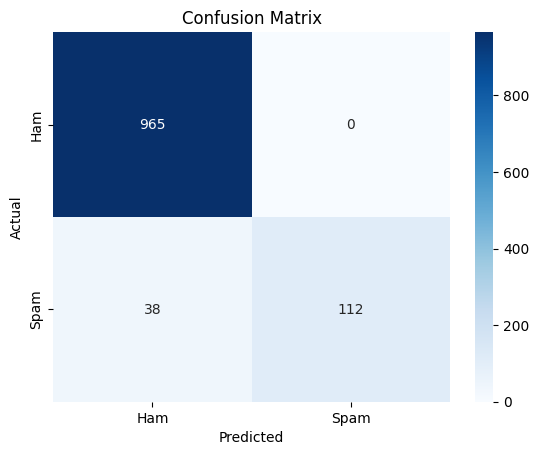

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#TEST EMAIL
def predict_email(text):
    text = clean(text)  # Preprocess text
    text_vectorized = vectorizer.transform([text])
    prediction = model.predict(text_vectorized)
    return "Spam" if prediction[0] == 1 else "Not Spam"

# Test
sample_email = "Congratulations on your purchase of Enter now to win a $25 gift card of your choice*Your Code is: Unfortunately you did not win this time. Enjoy!\The Sweatcoin Team"
print(predict_email(sample_email))

Spam
